In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter('ignore')

In [2]:
money = pd.read_csv('money_sports_clean.csv', index_col=0)
sports = pd.read_csv('abilities_sports_clean.csv',index_col=0)

In [3]:
money.head()

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings_million
0,1,Mike Tyson,USA,1,Boxing,1990,28.6
1,2,Buster Douglas,USA,2,Boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,Boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,Auto Racing,1990,10.0
4,5,Alain Prost,France,5,Auto Racing,1990,9.0


In [4]:
sports.head()

,Sport,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude,Total,Rank
0,Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63,72.375,1
1,Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50,71.750,2
2,Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13,68.375,3
3,Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38,67.875,4
4,Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38,63.500,5


First let's take an overall view of the total (the sum of all aptitudes) for all sports

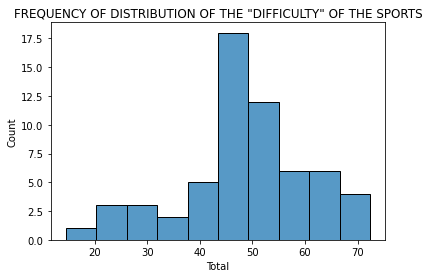

In [48]:
sns.histplot(data=sports, x=sports.Total).set(title='FREQUENCY OF DISTRIBUTION OF THE "DIFFICULTY" OF THE SPORTS');

In [40]:
figa = go.Figure([go.Bar(x=sports.Sport, y=sports.Total)])
figa.update_layout(
    autosize=False,
    width=1100,
    height=800
)
figa.update_layout(title='SUM OF ALL THE VALUES OF THE CHARACTERISTICS OF EACH SPORT')
figa.show()

We can do serveral groupbys within the money dataframe to see a lot of individual things such as:
- How a certain sport has evolved in the last 30 years
- How much money has a singular sport made each year
- Which has been the most prevalent sports in the last 30 years in general and on each year
- The money made by each sport in the last 30 years


In [10]:
agrupado = money.groupby(['Sport'],as_index=False).agg({'earnings_million' : 'sum'})

In [11]:
agrupado.head()

,Sport,earnings_million
0,American Football,938.7
1,Auto Racing,1031.3
2,Baseball,168.6
3,Basketball,3433.3
4,Boxing,2298.8


In [37]:
figu = go.Figure([go.Bar(x=agrupado.Sport, y=agrupado.earnings_million )])
figu.update_layout(title='TOTAL EARNINGS OF EACH SPORT (IN MILLION USD) IN THE LAST 30 YEARS')
figu.show()

In [14]:
agrupado1 = money.groupby(['Year'],as_index=False).agg({'earnings_million' : 'mean'})

In [15]:
agrupado1.head()

,Year,earnings_million
0,1990,12.80
1,1991,18.35
2,1992,15.87
3,1993,17.83
4,1994,14.89


In [16]:
agrupado2 = money.groupby(['Year', 'Sport'], as_index=False).agg({'earnings_million': 'mean'})

In [17]:
agrupado3 = money.groupby(['Sport', 'Year']).mean()

In [18]:
agrupado3.reset_index(inplace = True)

In [19]:
agrupado3.head()

,Sport,Year,S.NO,Current Rank,earnings_million
0,American Football,1992,27.0,7.0,9.5
1,American Football,1993,40.0,10.0,11.5
2,American Football,1996,65.0,5.0,16.5
3,American Football,2004,134.0,3.0,42.0
4,American Football,2005,145.0,4.0,37.5


In [38]:
figi = px.line(agrupado3, x='Year', y='earnings_million', color='Sport')
'''
figi.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Courier",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)
'''
figi.update_layout(title='CHANGE IN EACH SPORT EARNINGS (IN MILLION USD) IN THE LAST 30 YEARS')
figi.show()

In [61]:
# explain the ups and down of the mayor sports

### ROI

I am goig to extract the 2 most dominant abilities from every sport, later on we will compare the sports and the amount they have earned in the last 30 years to conclude which ability has been the most profiteable in this lsat 30 years.

We can later on separate this study into different years (kind of bonus)

In [65]:
# lets create a new dataframe based on the sports dataframe but only containing the sports present in money

In [171]:
sports_cropped = sports[(sports.Sport == 'Boxing')|(sports.Sport == 'Auto Racing')|(sports.Sport == 'Golf')|
                       (sports.Sport == 'Basketball')|(sports.Sport == 'Tennis')|(sports.Sport == 'American Football')|
                       (sports.Sport == 'Baseball')|(sports.Sport == 'Hockey')|(sports.Sport == 'Nascar')|
                       (sports.Sport == 'Soccer')|(sports.Sport == 'Cycling')|(sports.Sport == 'Moto GP')|
                       (sports.Sport == 'Ice Hockey')|(sports.Sport == 'Cycling: Distance')|(sports.Sport == 'Rugby')]

In [172]:
sports_cropped.reset_index(inplace=True)

In [173]:
sports_cropped.drop('index', axis = 1, inplace = True)

In [174]:
sports_cropped.drop(columns=['Total', 'Rank'], inplace=True)

In [175]:
sports_cropped
# we have 9. MMA is in Boxing, moto GP and Nascar is in Auto Racing and American Football kind of like Rugby

,Sport,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude
0,Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63
1,Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50
2,Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38
3,Tennis,7.25,5.13,7.13,6.75,7.75,5.63,3.00,5.00,8.38,6.75
4,Soccer,7.75,4.50,5.13,7.25,8.25,4.75,3.63,6.25,6.50,7.50
5,Rugby,6.75,7.00,6.38,5.88,6.00,4.13,6.50,7.88,4.38,5.63
6,Cycling: Distance,9.63,6.38,6.25,5.13,3.75,2.63,5.88,6.88,3.00,4.88
7,Auto Racing,5.88,3.50,2.63,1.63,2.75,1.75,9.88,4.38,8.00,7.50
8,Golf,3.25,3.88,6.13,1.63,1.75,4.00,2.50,2.38,6.00,6.38


In [154]:
#now I want to take the 2 (or 3) most importnt characteristics of each sport

In [ ]:
def counters(df):
    counter_max1 = 0
    counter_max2 = 0
    for i, row in df.iterrows():
        

In [239]:
sports_cropped.drop('Sport', axis = 1, inplace = True)
#this is done because nlargest wont iterate when a row has a integer, later on we will add this columns again

In [228]:
list_ = []
for i, row in sports_cropped.iterrows():
    x = sports_cropped.iloc[i].nlargest(2)[1]
    list_.append(x)

In [229]:
list_

[8.63, 7.88, 7.75, 7.75, 7.75, 7.0, 6.88, 8.0, 6.38]

In [230]:
sports_cropped['Max2'] = list_

In [234]:
sports_cropped.drop(columns=['Hola', 'max2', 'col'], axis = 1, inplace=True)

In [236]:
sports_cropped["Max1"] = sports_cropped.max(axis = 1) # esto funcionaaaaaa

In [237]:
sports_cropped

,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude,Max2,Max1
0,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63,8.63,8.88
1,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50,7.88,8.25
2,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38,7.75,8.13
3,7.25,5.13,7.13,6.75,7.75,5.63,3.00,5.00,8.38,6.75,7.75,8.38
4,7.75,4.50,5.13,7.25,8.25,4.75,3.63,6.25,6.50,7.50,7.75,8.25
5,6.75,7.00,6.38,5.88,6.00,4.13,6.50,7.88,4.38,5.63,7.00,7.88
6,9.63,6.38,6.25,5.13,3.75,2.63,5.88,6.88,3.00,4.88,6.88,9.63
7,5.88,3.50,2.63,1.63,2.75,1.75,9.88,4.38,8.00,7.50,8.00,9.88
8,3.25,3.88,6.13,1.63,1.75,4.00,2.50,2.38,6.00,6.38,6.38,6.38


In [240]:
# add column sports

### let's try some scaterplots within the dataframe sports, to see if there is any ability correlated with another

In [53]:
sports_ab = sports[['Endurance', 'Strength', 'Power', 'Speed', 'Agility', 'Flexibility', 'Nerve', 'Durability', 'Hand-Eye Coordination', 'Analytical Aptitude']]

In [55]:
sports_ab.head()
# we created a dataframe with only the abilities tested 

,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude
0,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63
1,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50
2,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13
3,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38
4,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38


In [56]:
correlation = sports_ab.corr()

In [57]:
correlation

,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude
Endurance,1.000000,0.465957,0.331431,0.508998,0.404104,0.166356,0.036551,0.612059,0.032386,0.301490
Strength,0.465957,1.000000,0.853117,0.473869,0.302558,0.284588,0.326709,0.708233,-0.162232,-0.052822
Power,0.331431,0.853117,1.000000,0.621509,0.437006,0.344320,0.169321,0.539807,0.043739,0.045420
Speed,0.508998,0.473869,0.621509,1.000000,0.656815,0.397697,0.033559,0.500793,0.075236,0.165312
Agility,0.404104,0.302558,0.437006,0.656815,1.000000,0.592108,0.215420,0.573332,0.495100,0.478133
Flexibility,0.166356,0.284588,0.344320,0.397697,0.592108,1.000000,0.245350,0.357917,-0.024113,-0.020184
Nerve,0.036551,0.326709,0.169321,0.033559,0.215420,0.245350,1.000000,0.596261,0.028128,0.135726
Durability,0.612059,0.708233,0.539807,0.500793,0.573332,0.357917,0.596261,1.000000,0.084581,0.301489
Hand-Eye Coordination,0.032386,-0.162232,0.043739,0.075236,0.495100,-0.024113,0.028128,0.084581,1.000000,0.727969
Analytical Aptitude,0.301490,-0.052822,0.045420,0.165312,0.478133,-0.020184,0.135726,0.301489,0.727969,1.000000


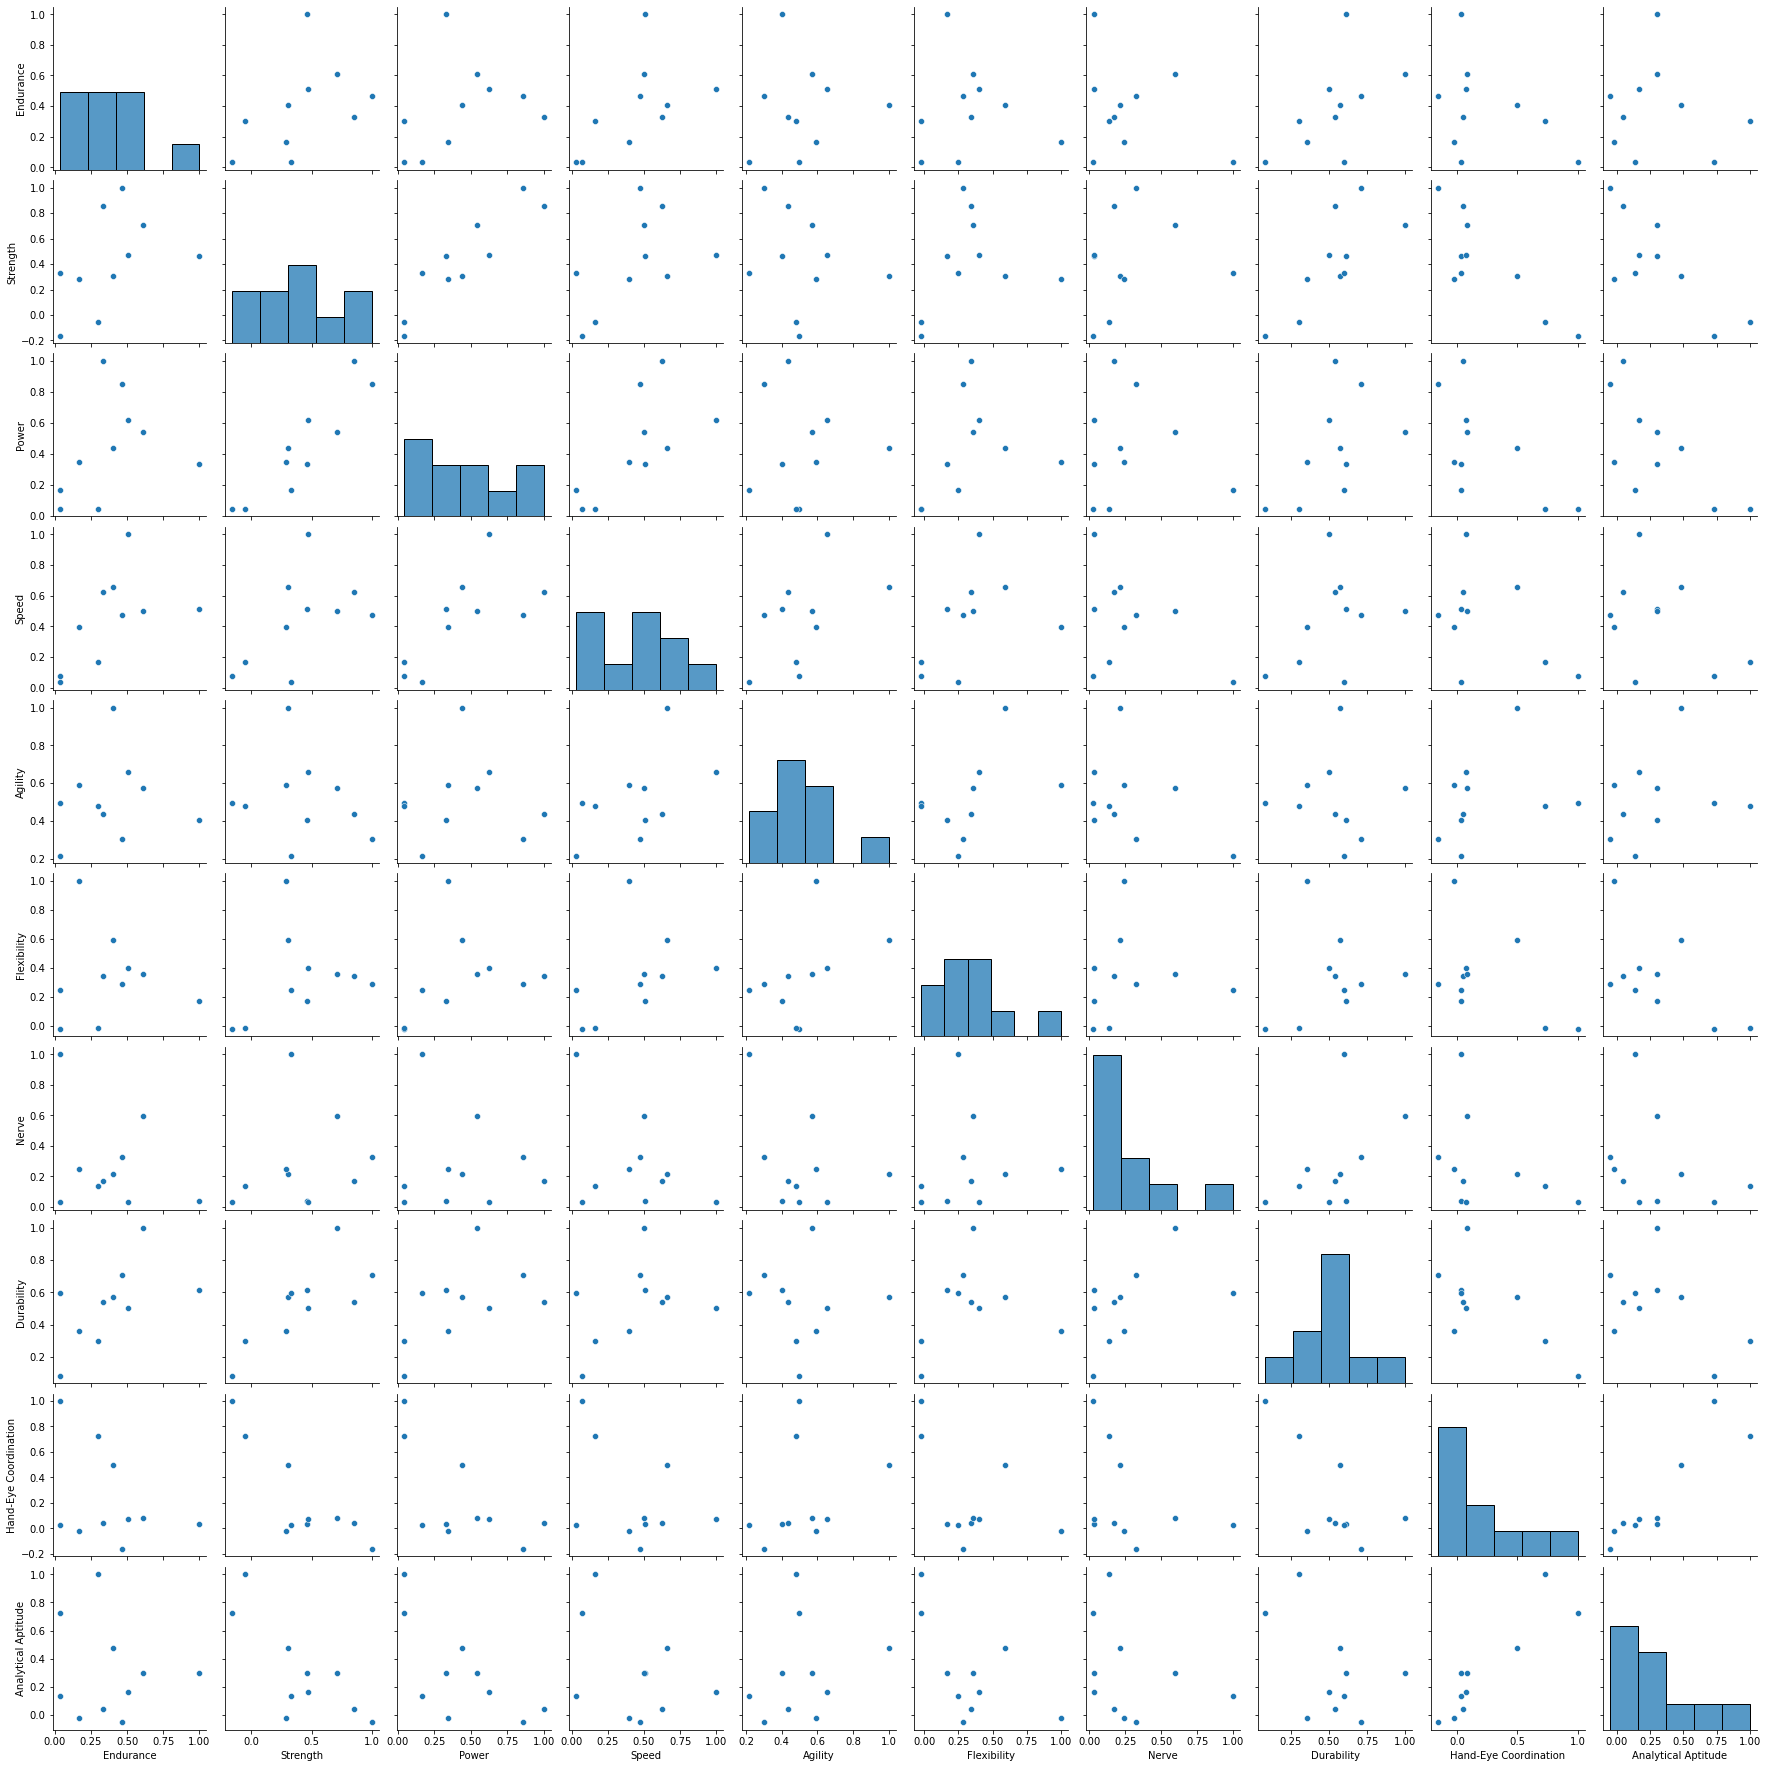

In [58]:
sns.pairplot(correlation)